In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import cufflinks as cf
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings("ignore")

cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



/kaggle/input/apple-stock-price-from-19802021/AAPL.csv


# Inspiration

#### Machine Learning and one thing we associate it with is Finance.
#### Algorithmic Trading, Quants, Hyper fast trading and all the other fancy words resonate with the field of Machine Learning and AI.
#### I can't be the only person on this earth who day dreamed about creating a model/machine that can tell me whether a stock price would rise or fall tomorrow. 
#### I mean with this, I would definitely be the richest person on the planet. 

#### I am by no means going to try to create one, because firstly, I am not that talented and secondly, I did not graduate from Hogwarts. 
#### However, I will try to utilize some basic Machine Learning model that we all have access to and see whether we can build a model that we can make some money from. 
#### This is friendly to beginners and sure to intrigue others with more experience so do follow along with me on this journey where we try to predict the stock price of the very famous company, Apple!

<div style="width:100%;text-align: center;"> <img align=middle src="https://images.unsplash.com/photo-1523206489230-c012c64b2b48?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8NHx8aXBob25lfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=500&q=60" alt="Heat beating" style="height:500px;margin-top:3rem;"> </div>

# 0. Let's take a look at the data

In [2]:
df = pd.read_csv('../input/apple-stock-price-from-19802021/AAPL.csv')
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

#### See the first two lines: 12th December and 15th December.
#### Let's see how many dates such as above are missing.

In [4]:
from datetime import date

d0 = date(1980, 12, 12)
d1 = date(2022, 6, 17)
delta = d1 - d0
print(delta.days)

print("\nThere are {} days missing".format(delta.days-df.shape[0]))

15162

There are 4694 days missing


#### There seems to be quite a few days missing.

In [5]:
df.groupby(pd.Grouper(key='Date', axis=0, freq='Y')).count()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-31,13,13,13,13,13,13
1981-12-31,253,253,253,253,253,253
1982-12-31,253,253,253,253,253,253
1983-12-31,253,253,253,253,253,253
1984-12-31,253,253,253,253,253,253
1985-12-31,252,252,252,252,252,252
1986-12-31,253,253,253,253,253,253
1987-12-31,253,253,253,253,253,253
1988-12-31,253,253,253,253,253,253


#### Now we can see there are not much data missing but it is possibly due to weekends/holidays inbetween the dates. 
#### I believe we won't need to eliminate any rows/dates for this experiment.

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


#### No null values.
#### Let's plot the "Adj Close" price since it is a more accurate measure of closing price, taking into account different factors.

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

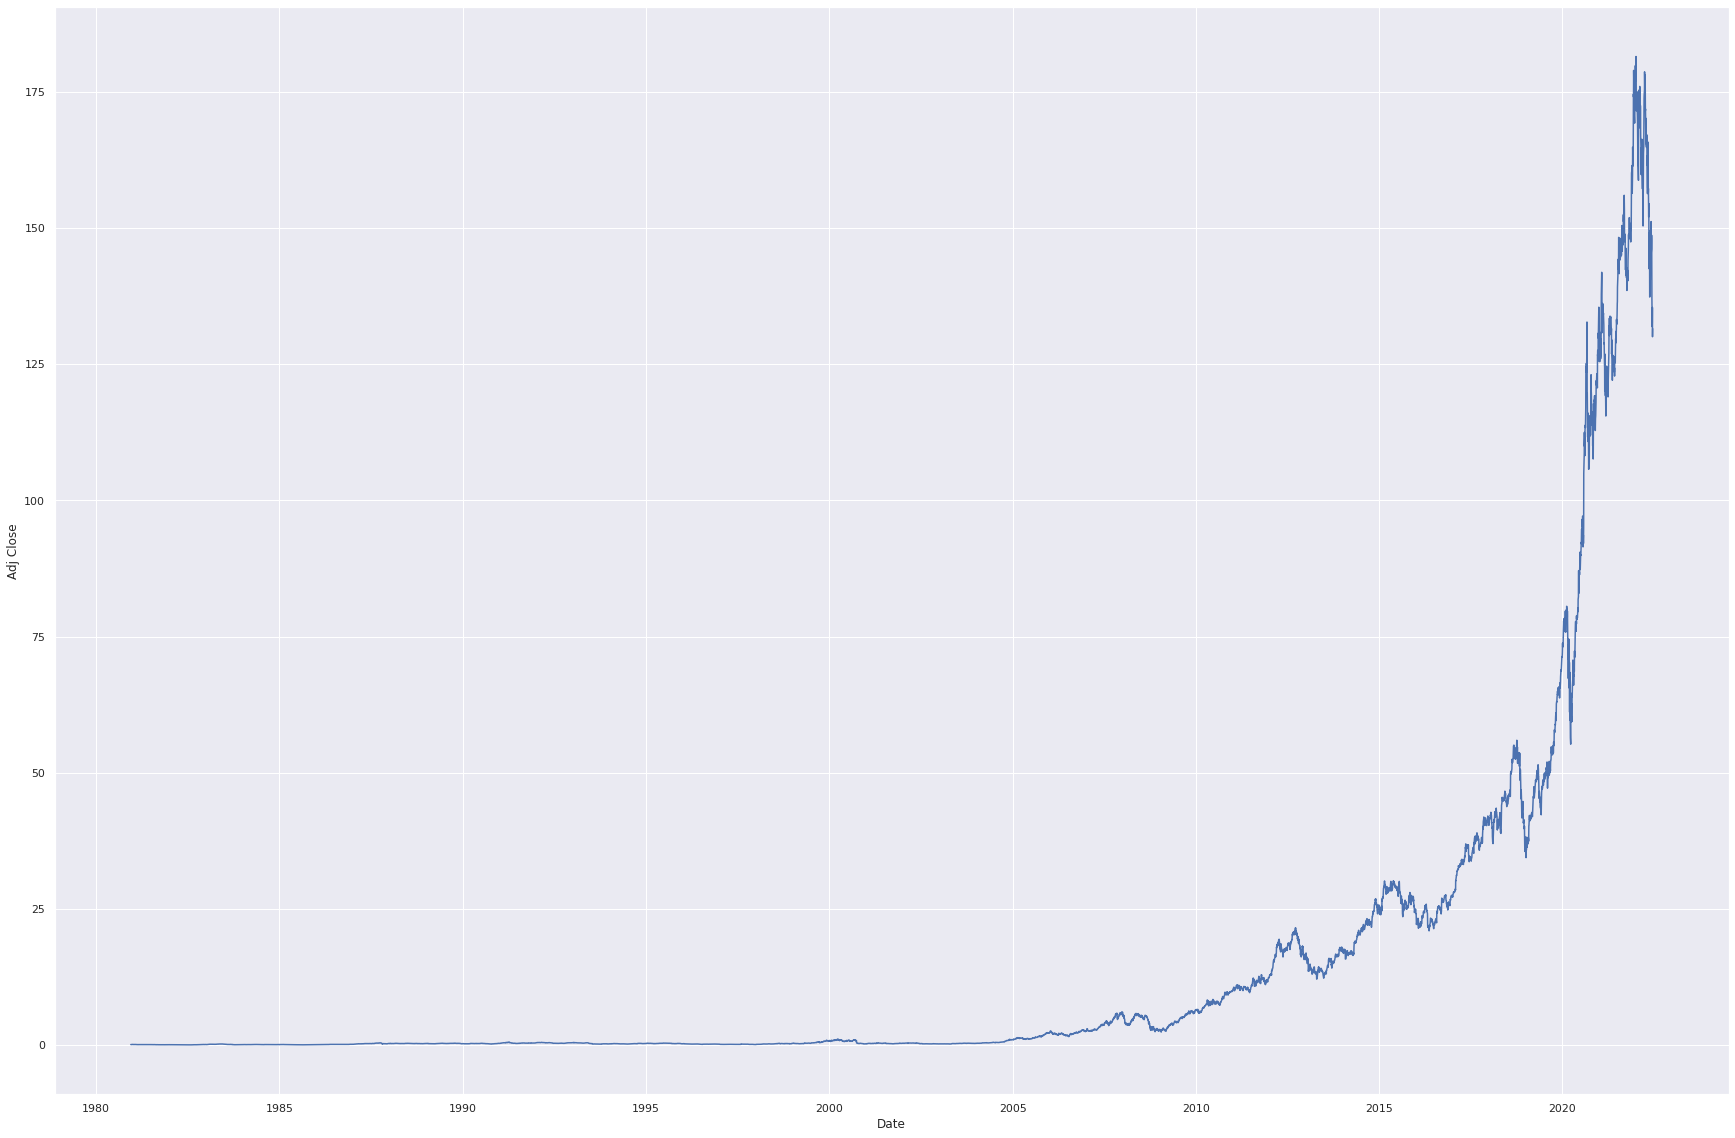

In [8]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(data=df, x="Date", y="Adj Close")

#### Let's create a more interactive chart.

In [9]:
import plotly.express as px

fig = px.line(df, x="Date", y="Adj Close", title='AAPL Stock Price')
fig.show()

# 1.1 Predicting up and down of stock

#### We are going to attempt to see whether we can build a model that can predict whether the stock price would be higher the next day or lower.
#### In theory, if we could produce a model with 100% accuracy, we would be able to see the future and buy the stock and sell the next day if our model says so.
#### Let's see how it goes.

## Preparing the data

#### Creating our target variable for our model to predict.

In [10]:
data = df[['Adj Close']]
df["Target"] = data.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Adj Close"]
df

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,1.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,1.0
...,...,...,...,...,...,...,...,...
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100,0.0
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300,1.0
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000,1.0
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900,0.0


#### Now we gotta shift all of the remaining columns to the future by a day.

In [11]:
df_shifted = df.copy()
df_shifted = df_shifted[[i for i in df.columns if i not in ['Date',  'Target']]].shift(1)
df_shifted[['Date','Target']] = df[['Date','Target']]
df_shifted = df_shifted[1:] # Dropping the first row with NaN values
df_shifted = df_shifted.set_index('Date')
df_shifted

,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,
1980-12-15,0.128348,0.128906,0.128348,0.128348,0.100178,469033600.0,0.0
1980-12-16,0.122210,0.122210,0.121652,0.121652,0.094952,175884800.0,0.0
1980-12-17,0.113281,0.113281,0.112723,0.112723,0.087983,105728000.0,1.0
1980-12-18,0.115513,0.116071,0.115513,0.115513,0.090160,86441600.0,1.0
1980-12-19,0.118862,0.119420,0.118862,0.118862,0.092774,73449600.0,1.0
...,...,...,...,...,...,...,...
2022-06-13,140.279999,140.759995,137.059998,137.130005,137.130005,91437900.0,0.0
2022-06-14,132.869995,135.199997,131.440002,131.880005,131.880005,122207100.0,1.0
2022-06-15,133.130005,133.889999,131.479996,132.759995,132.759995,84784300.0,1.0


#### The dataset is all set.

## Train Test Split

In [12]:
train_df = df_shifted[:int(df.shape[0]*0.7)]
test_df = df_shifted[int(df.shape[0]*0.7):]

In [13]:
train_df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,
2009-12-21,6.898929,6.982143,6.878571,6.979643,5.967721,608770400.0,1.0
2009-12-22,7.001786,7.133929,6.988214,7.079643,6.053221,611906400.0,1.0
2009-12-23,7.122857,7.173214,7.095000,7.155714,6.118264,349515600.0,1.0
2009-12-24,7.185714,7.227857,7.171786,7.217857,6.171397,345525600.0,1.0
2009-12-28,7.269643,7.476786,7.262500,7.465714,6.383317,500889200.0,1.0


In [14]:
test_df.head(5)

,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,
2009-12-29,7.561429,7.641071,7.486071,7.557500,6.461797,644565600.0,0.0
2009-12-30,7.593929,7.597143,7.454643,7.467857,6.385152,445205600.0,1.0
2009-12-31,7.458214,7.571429,7.439643,7.558571,6.462714,412084400.0,0.0
2010-01-04,7.611786,7.619643,7.520000,7.526071,6.434926,352410800.0,1.0
2010-01-05,7.622500,7.660714,7.585000,7.643214,6.535084,493729600.0,1.0


#### For time series data, we cannot just carry out the usual, normal train test split as we do not wish our model to see the data in the future. 
#### Therefore I have divided up as such but one concern that I have is that the training data stops at end of 2009 while the test data starts then.
#### Now as you can see from the chart, AAPL experienced tremendous growth roughly from 2016.
#### I believe this is going to introduce some bias into the model and lead to poor performance but let's see how it goes and think of a way to fix this possible concern.

## Model Selection

#### I will be using the Random Forest Classifier.

In [15]:
def train_and_predict(model, train_df, test_df):
    X_train = train_df.drop('Target', axis=1)
    y_train = train_df['Target']

    model.fit(X_train, y_train)
    
    X_test = test_df.drop('Target', axis=1)
    y_test = test_df['Target']

    pred = model.predict(X_test)
    score = accuracy_score(y_test, pred)

    # print("The accuracy score is {:.1f}%".format(score*100))
    return score

In [16]:
score = train_and_predict(RandomForestClassifier(), train_df, test_df)
print("The accuracy score is {:.1f}%".format(score*100))

The accuracy score is 53.0%


#### For such a simple model that sounds about right. 
#### The accuracy score stands at roughly 50% which is almost as equal as tossing a coin for making a decision.

#### Addressing my concern about the timeline of the train, test datasets, let's see what happens to the accuracy if we limit the data to start from 2010.

# 1.2 Predicting up and down of stock

In [17]:
df_shifted = df_shifted[df_shifted.index.year>=2010]
train_df_limited = df_shifted[:int(df_shifted.shape[0]*0.7)]
test_df_limited = df_shifted[int(df_shifted.shape[0]*0.7):]

In [18]:
train_df_limited.head(5)

,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,
2010-01-04,7.611786,7.619643,7.520000,7.526071,6.434926,352410800.0,1.0
2010-01-05,7.622500,7.660714,7.585000,7.643214,6.535084,493729600.0,1.0
2010-01-06,7.664286,7.699643,7.616071,7.656429,6.546384,601904800.0,0.0
2010-01-07,7.656429,7.686786,7.526786,7.534643,6.442255,552160000.0,0.0
2010-01-08,7.562500,7.571429,7.466071,7.520714,6.430346,477131200.0,1.0


In [19]:
train_df_limited.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,
2018-09-14,55.880001,57.087502,55.642502,56.602501,54.607464,166825600.0,0.0
2018-09-17,56.437500,56.709999,55.630001,55.959999,53.987606,127997200.0,0.0
2018-09-18,55.537498,55.737499,54.317501,54.470001,52.550129,148780400.0,1.0
2018-09-19,54.447498,55.462502,54.279999,54.560001,52.636951,126286800.0,1.0
2018-09-20,54.625000,54.904999,53.825001,54.592499,52.668304,108495200.0,1.0


In [20]:
test_df_limited.head(5)

,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,
2018-09-21,55.060001,55.570000,54.787498,55.007500,53.068668,106435200.0,0.0
2018-09-24,55.195000,55.340000,54.322498,54.415001,52.497063,384986800.0,1.0
2018-09-25,54.205002,55.314999,54.157501,55.197498,53.251980,110773600.0,1.0
2018-09-26,54.937500,55.705002,54.924999,55.547501,53.589649,98217600.0,0.0
2018-09-27,55.250000,55.937500,54.939999,55.105000,53.162743,95938800.0,1.0


In [21]:
train_and_predict(RandomForestClassifier(), train_df_limited, test_df_limited)

0.4734607218683652

#### As we can see, this approach didn't yield a better result. 
#### As a final attempt, I attempted some hyperparameter tuning but to no avail.

#### There was not much improvement in the model's accuracy. 
#### Attempting to predict whether the stock price would be higher or lower than today's value seems to be too tall a order.
#### Let us attempt to predict something else, the **price**.

# 2.1 Predicing the price

#### In this attempt, I will be using [LSTM network using Keras](https://www.projectpro.io/article/stock-price-prediction-using-machine-learning-project/571).
#### LSTM is a deep learning approach to predicting the price of stocks. 
#### You can read more about it [here](https://en.wikipedia.org/wiki/Long_short-term_memory).

In [22]:
df = pd.read_csv('../input/apple-stock-price-from-19802021/AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000


#### LSTM libraries and others

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#### Let's create our train data.

In [24]:
import math 
window = 20 # Number of days we are looking back for our predictions

close_prices = df['Adj Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(window, len(train_data)):
    x_train.append(train_data[i-window:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#### Let's create our test data.

In [25]:
test_data = scaled_data[training_data_len-window: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(window, len(test_data)):
    x_test.append(test_data[i-window:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#### Now let us build our LSTM model.

In [26]:
import keras

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(12))
model.add(layers.Dense(1))
model.summary()

2022-09-26 14:53:55.672582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 14:53:55.676203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 14:53:55.676905: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 14:53:55.678042: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 100)           40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 25)                2525      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 124,050
Trainable params: 124,050
Non-trainable params: 0
_________________________________________________________________


#### Now let's train them.

In [27]:
model.compile(optimizer='adam', loss='mean_squared_error')
with tf.device('/gpu:0'):
    model.fit(x_train, y_train, batch_size= 1, epochs=5)

2022-09-26 14:53:59.656746: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-09-26 14:54:02.978754: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


8355/8355 [==============================] - 39s 4ms/step - loss: 2.7466e-05
Epoch 2/5
8355/8355 [==============================] - 35s 4ms/step - loss: 7.3921e-06
Epoch 3/5
8355/8355 [==============================] - 34s 4ms/step - loss: 4.6559e-06
Epoch 4/5
8355/8355 [==============================] - 35s 4ms/step - loss: 3.5819e-06
Epoch 5/5
8355/8355 [==============================] - 35s 4ms/step - loss: 3.6441e-06


In [28]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("The root mean squared error is {:.2f}".format(rmse))

The root mean squared error is 12.74


#### Let us visualize them.

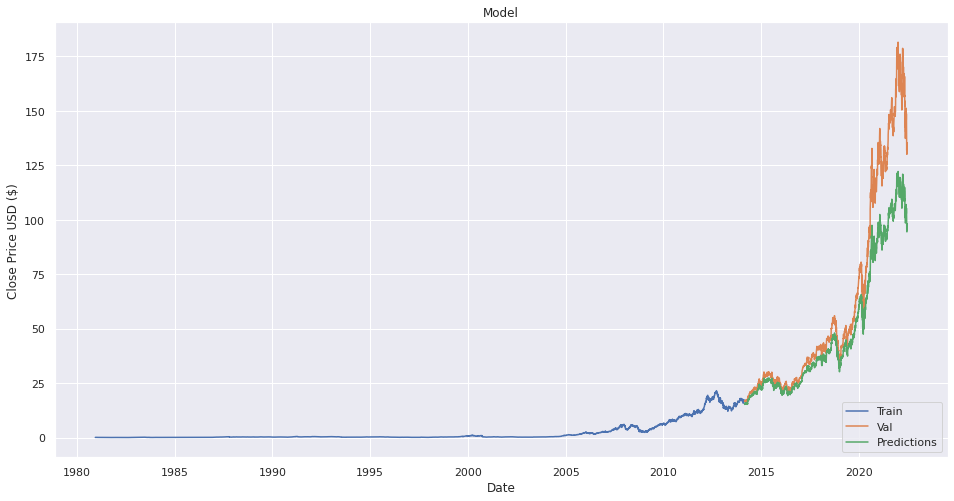

In [29]:
import matplotlib.pyplot as plt

data = df.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
fig = px.line(validation.reset_index(), x="Date", y=validation.reset_index().columns[1:], title='Predictions vs Actual')
fig.show()

#### This looks better than the previous method. 
#### However, I believe my concern about the time period for our dataset kicks in here where the model finds it hard to predict the exponential growth towards the later years after only been trained on old data. 
#### But I think we can go one step forward and take into account all the other features that we initially had.

# 2.2 Predicing the price with more features

#### Instead of just 'Adj Close' price for predictions, I will be attempting to use a multi-dimensional input, including other types of prices and the volume to feed into our LSTM model as its input.

#### Creating Train and Test set

In [31]:
df = pd.read_csv('../input/apple-stock-price-from-19802021/AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [32]:
close_prices = df['Adj Close']
values = close_prices.values
scaler_for_adjclose = MinMaxScaler(feature_range=(0,1)) # Important to separate out this scaler so that we can reverse prediction values later on
scaled_data_for_adjclose = scaler_for_adjclose.fit_transform(values.reshape(-1,1))

In [33]:
scaler_for_other_data = MinMaxScaler(feature_range=(0,1))
scaled_data_for_otherdata = scaler_for_other_data.fit_transform(df[[i for i in df.columns if i != 'Adj Close']])

In [34]:
final_scaled_data = np.concatenate((scaled_data_for_otherdata, scaled_data_for_adjclose), axis=1)

In [35]:
window = 20 # Number of days we are looking back for our predictions

df = pd.read_csv('../input/apple-stock-price-from-19802021/AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

training_data_len = math.ceil(len(values)* 0.8)

train_data = final_scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(window, len(train_data)):
    x_train.append(train_data[i-window:i, :])
    y_train.append(train_data[i, -1])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 6))

test_data = final_scaled_data[training_data_len-window: , : ]
x_test = []
y_test = final_scaled_data[training_data_len:, -1]

for i in range(window, len(test_data)):
    x_test.append(test_data[i-window:i, :])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 6))

#### Our new LSTM model with updated input shape

In [36]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 6)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(12))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20, 100)           42800     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 126,050
Trainable params: 126,050
Non-trainable params: 0
_________________________________________________________________


#### Training

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')
with tf.device('/gpu:0'):
    model.fit(x_train, y_train, batch_size= 1, epochs=5)

Epoch 1/5
8355/8355 [==============================] - 37s 4ms/step - loss: 1.6135e-05
Epoch 2/5
8355/8355 [==============================] - 35s 4ms/step - loss: 6.5657e-06
Epoch 3/5
8355/8355 [==============================] - 35s 4ms/step - loss: 4.2833e-06
Epoch 4/5
8355/8355 [==============================] - 35s 4ms/step - loss: 3.8847e-06
Epoch 5/5
8355/8355 [==============================] - 35s 4ms/step - loss: 2.5416e-06


#### Predictions

In [38]:
predictions = model.predict(x_test)
predictions = scaler_for_adjclose.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("The root mean squared error is {:.2f}".format(rmse))

The root mean squared error is 44.09


#### Visualizing

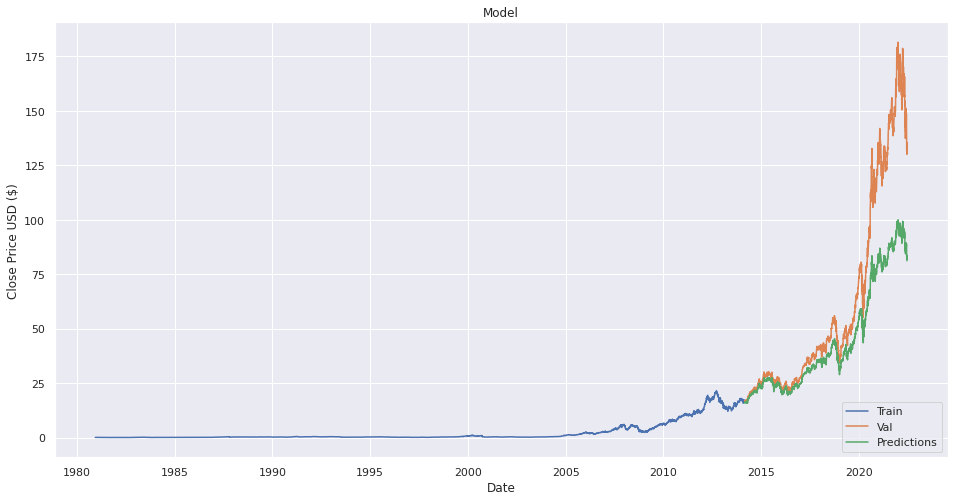

In [39]:
data = df.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#### Let's zoom in.

In [40]:
fig = px.line(validation.reset_index(), x="Date", y=validation.reset_index().columns[1:], title='Predictions vs Actual')
fig.show()

#### This is disappointing to see for sure. I expected better results for more features but I guess that is not the case. 
#### I believe the rationale behind this result is the fact that the other features do not belong in the LSTM model. 
#### The previous prices may influence the current price, which makes the LSTM an useful model but the other features such as volume might not fit well into the LSTM model, creating more chaos than constructive feedback.
#### I wish to take a different approach from here. Instead of training the model all the way from the 1980s, I wish to train them from 2015 to 2020 and test it on the future data points.

# 3.1 Price prediction using smaller dataset

In [41]:
df = pd.read_csv('../input/apple-stock-price-from-19802021/AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df[pd.DatetimeIndex(df['Date']).year>=2015].set_index('Date')[[i for i in df.columns if i!= 'Date']]

window = 20 # Number of days we are looking back for our predictions

close_prices = df['Adj Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(window, len(train_data)):
    x_train.append(train_data[i-window:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = scaled_data[training_data_len-window: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(window, len(test_data)):
    x_test.append(test_data[i-window:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [42]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=False, input_shape=(x_train.shape[1], 1)))
model.add(layers.Dense(12))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_6 (Dense)              (None, 12)                1212      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 42,025
Trainable params: 42,025
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')
with tf.device('/gpu:0'):
    model.fit(x_train, y_train, batch_size= 1, epochs=5)

Epoch 1/5
1484/1484 [==============================] - 5s 3ms/step - loss: 5.3417e-04
Epoch 2/5
1484/1484 [==============================] - 4s 3ms/step - loss: 2.6754e-04
Epoch 3/5
1484/1484 [==============================] - 4s 3ms/step - loss: 1.7433e-04
Epoch 4/5
1484/1484 [==============================] - 4s 3ms/step - loss: 1.7662e-04
Epoch 5/5
1484/1484 [==============================] - 4s 3ms/step - loss: 1.4828e-04


In [44]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("The root mean squared error is {:.2f}".format(rmse))

The root mean squared error is 0.40


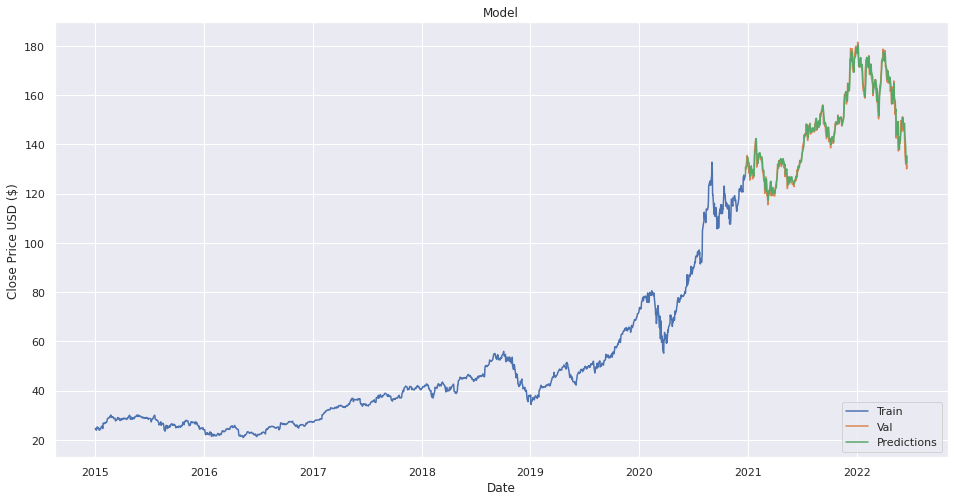

In [45]:
data = df.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#### Let's zoom in closer.

In [46]:
fig = px.line(validation.reset_index(), x="Date", y=validation.reset_index().columns[1:], title='Predictions vs Actual')
fig.show()

#### Now as we can see,that gives us a more accurate result with a smaller RMSE.
#### Certainly the scope of the dataset we feed into our model seems to play a role in our model's accuracy.
#### With this dataset, let us see if a more complex model would help us in better predicting the prices.

# 3.2 Price prediction using smaller dataset with more complex model

In [47]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(12))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 20, 100)           40800     
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_8 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_9 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 13        
Total params: 124,050
Trainable params: 124,050
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer='adam', loss='mean_squared_error')
with tf.device('/gpu:0'):
    model.fit(x_train, y_train, batch_size= 1, epochs=5)

Epoch 1/5
1484/1484 [==============================] - 9s 4ms/step - loss: 9.8307e-04
Epoch 2/5
1484/1484 [==============================] - 6s 4ms/step - loss: 4.6759e-04
Epoch 3/5
1484/1484 [==============================] - 6s 4ms/step - loss: 0.0010
Epoch 4/5
1484/1484 [==============================] - 6s 4ms/step - loss: 4.0593e-04
Epoch 5/5
1484/1484 [==============================] - 7s 5ms/step - loss: 3.0739e-04


#### Predicting

In [49]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("The root mean squared error is {:.2f}".format(rmse))

The root mean squared error is 2.12


#### Visualization

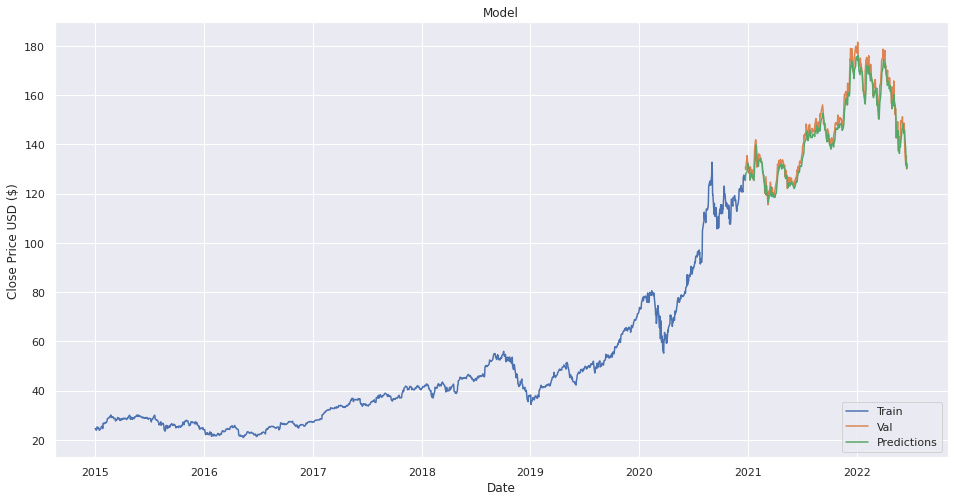

In [50]:
data = df.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#### Zooming in closer

In [51]:
fig = px.line(validation.reset_index(), x="Date", y=validation.reset_index().columns[1:], title='Predictions vs Actual')
fig.show()

#### As you can see, a slightly more complex model seemed to do just fine but for this dataset, a simple model seemed to do better. 
#### However one thing I noticed after experimenting with the model architecture was that this was also very sensitive to overfitting. 
#### Let me show you.

# 3.3 Price prediction using smaller dataset with an **extremely** complex model

In [52]:
model = keras.Sequential()
model.add(layers.LSTM(400, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(400, return_sequences=False))
model.add(layers.Dense(5000))
model.add(layers.Dense(1000))
model.add(layers.Dense(500))
model.add(layers.Dense(200))
model.add(layers.Dense(100))
model.add(layers.Dense(50))
model.add(layers.Dense(25))
model.add(layers.Dense(12))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 20, 400)           643200    
_________________________________________________________________
lstm_8 (LSTM)                (None, 400)               1281600   
_________________________________________________________________
dense_11 (Dense)             (None, 5000)              2005000   
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              5001000   
_________________________________________________________________
dense_13 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_14 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_15 (Dense)             (None, 100)              

In [53]:
model.compile(optimizer='adam', loss='mean_squared_error')
with tf.device('/gpu:0'):
    model.fit(x_train, y_train, batch_size= 1, epochs=10)

Epoch 1/10
1484/1484 [==============================] - 10s 5ms/step - loss: 0.0093
Epoch 2/10
1484/1484 [==============================] - 8s 6ms/step - loss: 97.4318
Epoch 3/10
1484/1484 [==============================] - 8s 5ms/step - loss: 0.0159
Epoch 4/10
1484/1484 [==============================] - 8s 5ms/step - loss: 0.0217
Epoch 5/10
1484/1484 [==============================] - 8s 5ms/step - loss: 0.0087
Epoch 6/10
1484/1484 [==============================] - 8s 6ms/step - loss: 0.0063
Epoch 7/10
1484/1484 [==============================] - 8s 5ms/step - loss: 0.0024
Epoch 8/10
1484/1484 [==============================] - 8s 5ms/step - loss: 8.7567e-04
Epoch 9/10
1484/1484 [==============================] - 8s 5ms/step - loss: 8660.5576
Epoch 10/10
1484/1484 [==============================] - 8s 6ms/step - loss: 0.3758


#### Predicting

In [54]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("The root mean squared error is {:.2f}".format(rmse))

The root mean squared error is 119.75


#### Visualizing

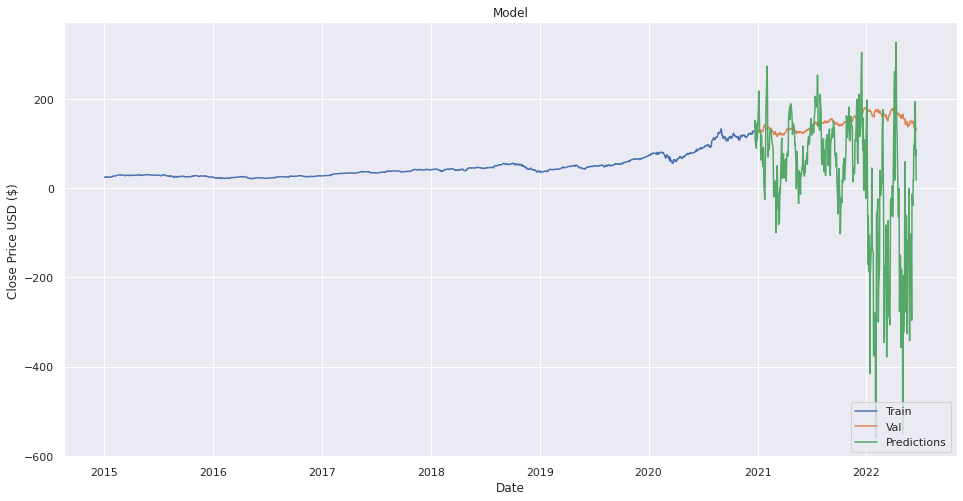

In [55]:
data = df.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#### Zooming in closer

In [56]:
fig = px.line(validation.reset_index(), x="Date", y=validation.reset_index().columns[1:], title='Predictions vs Actual')
fig.show()

#### As you can see, a model with almost close to 9.5 million parameters don't fare well compared to a lesser complex model.
#### This is a clear sign of **overfitting**, something we as Machine Learning enthusiasts have to keep in mind. 
#### The RMSE increased almost three folds and its flaw is obvious even from the visualization graphs. 

#### Now this just goes to show how impressive a well built LSTM model can help predict the stock prices. 
#### However as I have mentioned, this impressive result is subjective to the dataset it is trained on. 
#### As I have shown, using the whole dataset, dating back from the 1980s didn't yield very impressive results. 
#### This drawback definitely demands scrutiny.

#### Now as a final endeavour, I know we all want to make money!
#### I wish to find out if this model can correctly predict the price tomorrow so that if the price is predicted to be higher, we will go long and if not, we will go short. 
#### Let us try it out!

# 4. Can our model be profitable?

In [57]:
model = keras.Sequential()
model.add(layers.LSTM(30, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(20, return_sequences=False))
model.add(layers.Dense(10))
model.add(layers.Dense(5))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
with tf.device('/gpu:0'):
    model.fit(x_train, y_train, batch_size= 1, epochs=5)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 20, 30)            3840      
_________________________________________________________________
lstm_10 (LSTM)               (None, 20)                4080      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 6         
Total params: 8,191
Trainable params: 8,191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1484/1484 [==============================] - 8s 4ms/step - loss: 6.1794e-04
Epoch 2/5
1484/1484 [===========

#### Predicting

In [58]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("The root mean squared error is {:.2f}".format(rmse))

The root mean squared error is 1.57


In [59]:
data = df.filter(['Adj Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions

display(validation)

,Adj Close,Predictions
Date,,
2020-12-22,130.713120,129.442673
2020-12-23,129.801270,131.085159
2020-12-24,130.802338,131.924805
2020-12-28,135.480576,132.639191
2020-12-29,133.676666,135.187408
...,...,...
2022-06-13,131.880005,141.753738
2022-06-14,132.759995,136.525314
2022-06-15,135.429993,134.287308


#### Visualizing

In [60]:
fig = px.line(validation.reset_index(), x="Date", y=validation.reset_index().columns[1:], title='Predictions vs Actual')
fig.show()

#### The 'Adj Close' column is the real value of the adjusted closing price that day.
#### The 'Predictions' column is the predicted value of the adjusted closing price based on the prices of certain number of days before, which in this case is 20 days.
#### Now let us change the validation dataframe appropriately.

In [61]:
validation['Actual Price'] = validation['Adj Close']
validation['Yesterday Price'] = validation['Adj Close'].shift(1)
validation['Yesterday Prediction Price'] = validation['Predictions'].shift(1)
validation.drop('Adj Close', axis=1, inplace=True)
validation = validation[1:]

display(validation)

,Predictions,Actual Price,Yesterday Price,Yesterday Prediction Price
Date,,,,
2020-12-23,131.085159,129.801270,130.713120,129.442673
2020-12-24,131.924805,130.802338,129.801270,131.085159
2020-12-28,132.639191,135.480576,130.802338,131.924805
2020-12-29,135.187408,133.676666,135.480576,132.639191
2020-12-30,136.069595,132.536850,133.676666,135.187408
...,...,...,...,...
2022-06-13,141.753738,131.880005,137.130005,146.145172
2022-06-14,136.525314,132.759995,131.880005,141.753738
2022-06-15,134.287308,135.429993,132.759995,136.525314


#### Now the Adjusted Close column shows the price the day before and the respective Predictions column would show the predicted price for that day, one day after the Adjusted Close price.
#### Now if the 'Predictions' column is higher than the 'Yesterday Price' price, we should go long. (Let's consider only long positions)
#### Then, we can use the 'Actual Price' column to check whether our decision was correct.

#### Another approach that we can think of since our model might not predict the prices accurately enough, we can just utilize its own predictions.
#### For instance, if it's prediction today is higher than yesterday's, we can consider that going long and we can check if the price movement was true for the actual value.

In [62]:
correct, total, total_2, correct_2 = 0, 0, 0, 0

for i in range(validation.shape[0]):
    if validation.iloc[i, 0] > validation.iloc[i, -2]:
        total += 1
        if validation.iloc[i, 1] > validation.iloc[i,-2]:
            correct += 1
    if validation.iloc[i,0] > validation.iloc[i,-1]:
        total_2 += 1
        if validation.iloc[i, 1] > validation.iloc[i,-2]:
            correct_2 += 1
if total != 0:
    correct_per = (correct/total)*100
    print("The percentage we got it correct using the first method is {:.2f}%".format(correct_per))
else:
    print("First method is not working due to an inaccurate model")
correct_per_2 = (correct_2/total_2)*100



print("The percentage we got it correct using the second method is {:.2f}%".format(correct_per_2))

The percentage we got it correct using the first method is 51.77%
The percentage we got it correct using the second method is 49.49%


#### Well now I would say that is a improvement from our very first attempt which barely yielded a 50% success rate. 
#### This success rate isn't too great either.

#### Surely this model is not comprehensive enough.
#### If I could, I would include other features such as RSI, Bollinger Bands and other technical features and maybe even take in the daily news, with the usage of other models apart from LSTM as the LSTM would perform poorly with daily news. 
#### I will be back with a more comprehensive model in the future so do keep a lookout for that but for now...

## There is no crystal ball in the stock market. 

<div style="width:100%;text-align: center;"> <img align=middle src="https://images.unsplash.com/photo-1453227588063-bb302b62f50b?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80" alt="Heat beating" style="height:400px;margin-top:3rem;"> </div>

# 5. Future price predictions

#### We may be disappointed that this model cannot provide us with a crystal ball to help us predict whether the price would be higher or lower tomorrow.
#### However, out of curiousity, what do you think the model would say about how the price would move in the foreseeable future? 
#### Now I cannot reinforce enough that what I'm about to do is full of flaws and limitations. 
#### The first obvious one is that this LSTM model assumes that the current predictions depends solely on the value's past history.
#### However, Apple's stock price definitely does not only depend on how its price moved in the past couple of days but other variables such as news, interest rate decisions, market sentiment, global situations and so much more. 

#### So this is just out of curiosity. 
#### So please **take it with a grain of salt**.

#### From June 17th onwards, we don't have any actual data. 
#### So from then on, we would use our model's predictions as it's inputs to predict future prices, up to 6 months.
#### My expectation for these predictions is that it is going to be horrendous but that's where the fun lies right? 

#### Training model on most recent dataset (from 2020 onwards)

In [63]:
df = pd.read_csv('../input/apple-stock-price-from-19802021/AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df[pd.DatetimeIndex(df['Date']).year>=2020].set_index('Date')[[i for i in df.columns if i!= 'Date']]

window = 30 # Number of days we are looking back for our predictions

close_prices = df['Adj Close']
values = close_prices.values
training_data_len = len(values)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(window, len(train_data)):
    x_train.append(train_data[i-window:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [64]:
model = keras.Sequential()
model.add(layers.LSTM(30, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(20, return_sequences=False))
model.add(layers.Dense(10))
model.add(layers.Dense(5))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
with tf.device('/gpu:0'):
    model.fit(x_train, y_train, batch_size= 1, epochs=10)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 30, 30)            3840      
_________________________________________________________________
lstm_12 (LSTM)               (None, 20)                4080      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 6         
Total params: 8,191
Trainable params: 8,191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
591/591 [==============================] - 5s 4ms/step - loss: 0.0109
Epoch 2/10
591/591 [=================

#### Engineering our dataset

In [65]:
initial_input = validation[-window:]['Actual Price'].values
initial_input = scaler.transform(initial_input.reshape(-1,1))
initial_input = np.array(initial_input)

#### Predicting

In [66]:
res = []
for i in range(180):
    prediction = model.predict(initial_input.reshape(1,initial_input.shape[0],1))
    prediction_inversed = scaler.inverse_transform(prediction)
    initial_input = initial_input[1:]
    initial_input = np.append(initial_input, prediction)
    res.append(prediction_inversed[0][0])

#### Visualizing

In [67]:
date_range = pd.date_range(start='2022-06-18', freq='D', periods=180)
predicting_df = pd.DataFrame({'Date':date_range, 'Predictions': res})
display(predicting_df)

,Date,Predictions
0,2022-06-18,131.081192
1,2022-06-19,130.995880
2,2022-06-20,130.980667
3,2022-06-21,131.001480
4,2022-06-22,131.032944
...,...,...
175,2022-12-10,102.946358
176,2022-12-11,102.661469
177,2022-12-12,102.374878
178,2022-12-13,102.086571


In [68]:
new_df = pd.concat([df.reset_index()[['Date', 'Adj Close']].rename(columns={'Adj Close': 'Predictions'}),predicting_df, ])
display(new_df)

,Date,Predictions
0,2020-01-02,73.785912
1,2020-01-03,73.068565
2,2020-01-06,73.650795
3,2020-01-07,73.304413
4,2020-01-08,74.483620
...,...,...
175,2022-12-10,102.946358
176,2022-12-11,102.661469
177,2022-12-12,102.374878
178,2022-12-13,102.086571


In [69]:
fig = px.line(new_df, x="Date", y=predicting_df.reset_index().columns[2:], title='Predictions in the future')
fig.show()

#### Now that is not what I was expecting but our model seems to suggest that AAPL price would run higher.
#### Personally, I think this is unjustified, especially when we observe the current economic situation. 
#### However, as I said, do take this with a **pinch of salt**!!!
#### This is what the model thinks and it is probably because of it's previous predictions recording constant uptrends.

#### This again proves the previous point.

## There is no crystal ball in the stock market.

<div style="width:100%;text-align: center;"> <img align=middle src="https://images.unsplash.com/photo-1544717301-9cdcb1f5940f?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8ZGlzYXBwb2ludGVkfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=500&q=60" alt="Heat beating" style="height:400px;margin-top:3rem;"> </div>